In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from einops import rearrange
import torch
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
def matrixfactorization(y,r,lr):
    t,k,m = y.shape
    y = y.reshape(t*k,m)
    w = np.random.randn(t*k,r)
    h = np.random.randn(r,m)
    for i in range(500):
        ypred = np.dot(w,h)
        w2 = w.copy()
        w += 2*lr*np.dot(y-ypred,h.T)/(t*k)
        h += 2*lr*np.dot(w2.T,y-ypred)/m
    final = np.dot(w,h)
    return w,h,final

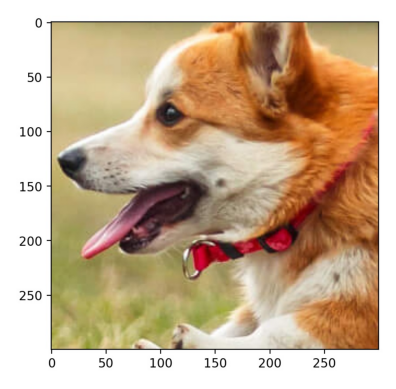

In [ ]:
imag = torchvision.io.read_image('es335-24-fall-assignment-2-master/sample_images/WhatsApp Image 2024-09-19 at 21.59.48_456cce48.jpg')
plt.imshow(rearrange(imag, 'c h w -> h w c').numpy())
plt.axis('off')
plt.show()

546 555


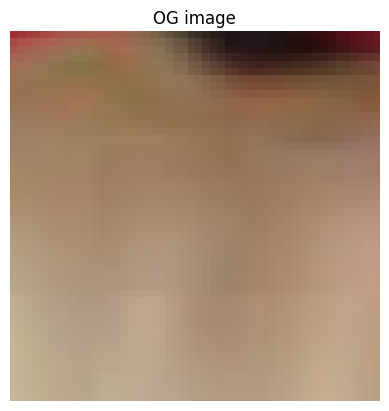

Test for r = 5
RMSE = 4.261549014149667
PSNR = 35.53945385188737


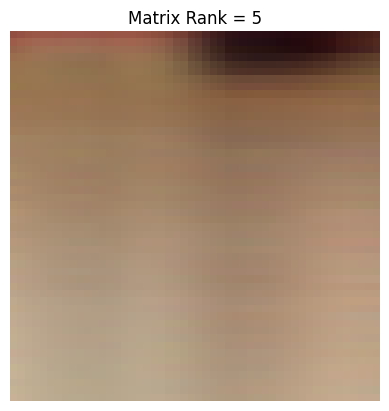

Test for r = 10
RMSE = 3.480344810503695
PSNR = 37.298358144226185


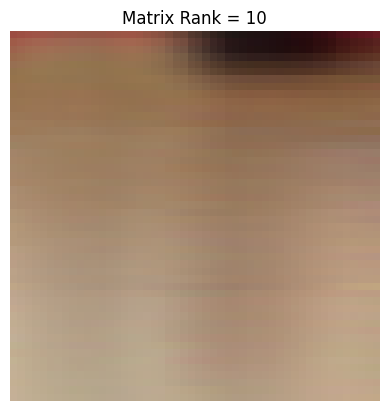

Test for r = 25
RMSE = 3.011555522760068
PSNR = 38.554986119041665


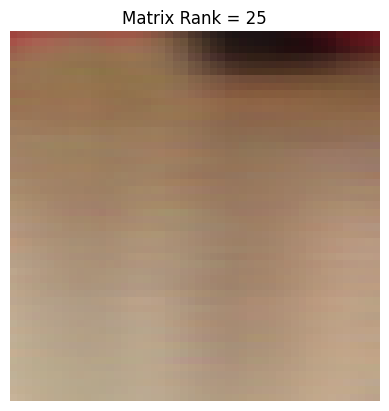

Test for r = 50
RMSE = 2.404329428343795
PSNR = 40.51092416643964


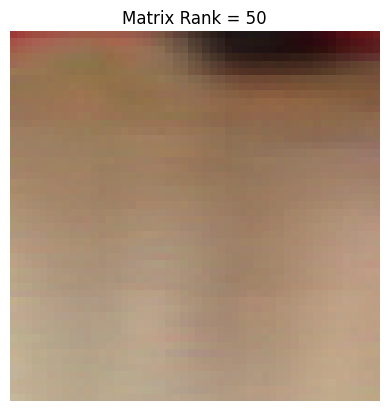

Test for r = 150
RMSE = 1.6519887005263283
PSNR = 43.770662159595304


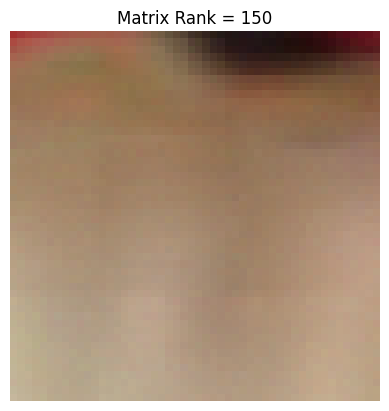

Test for r = 300
RMSE = 0.7794870107962031
PSNR = 50.29462595677161


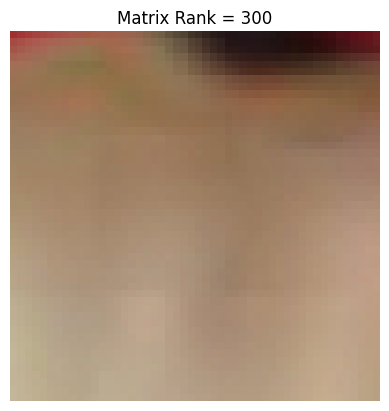

None
513 574


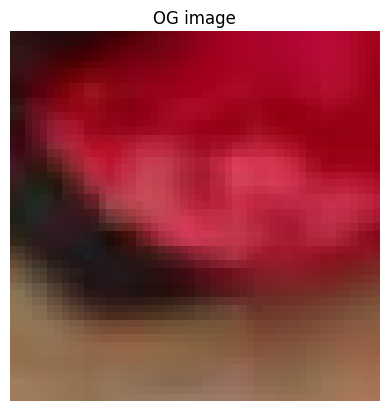

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Test for r = 5
RMSE = 6.346421563894623
PSNR = 32.08022527011866


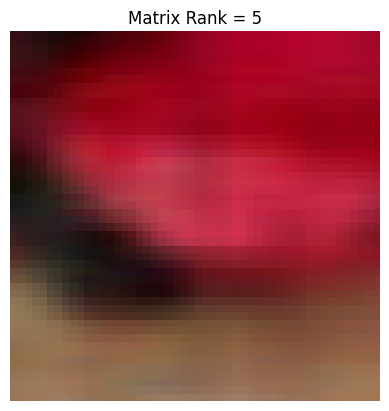

Test for r = 10
RMSE = 3.599925925163831
PSNR = 37.00493231901988


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


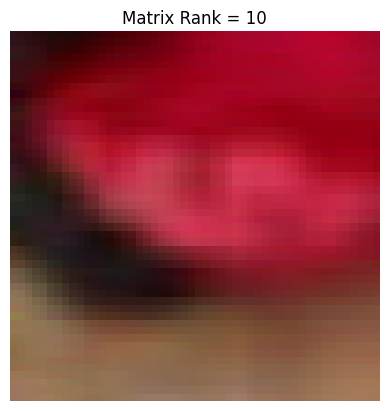

Test for r = 25
RMSE = 2.7547776679797593
PSNR = 39.32907253560114


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


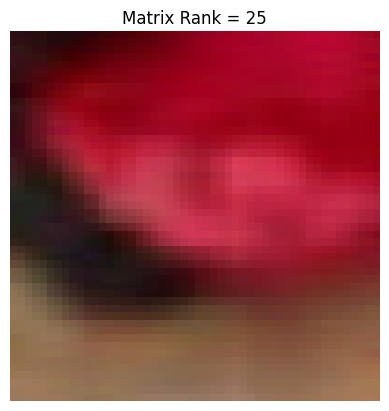

Test for r = 50


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RMSE = 2.3126896318644516
PSNR = 40.84845654092656


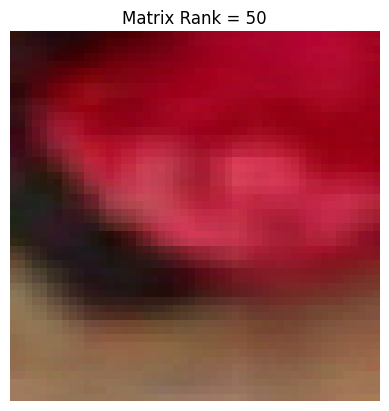

Test for r = 150


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RMSE = 1.5847607600728466
PSNR = 44.13152942488925


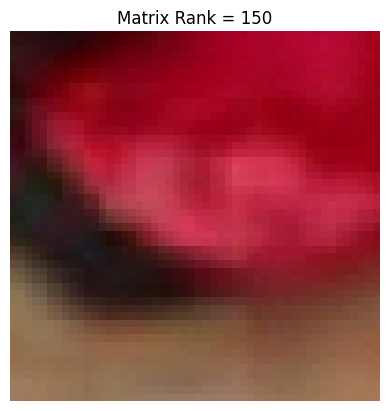

Test for r = 300


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


RMSE = 0.7584194090343417
PSNR = 50.53261483493084


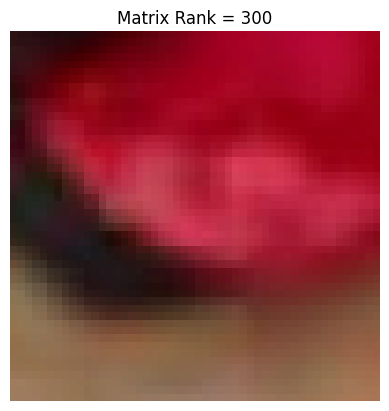

None
598 540


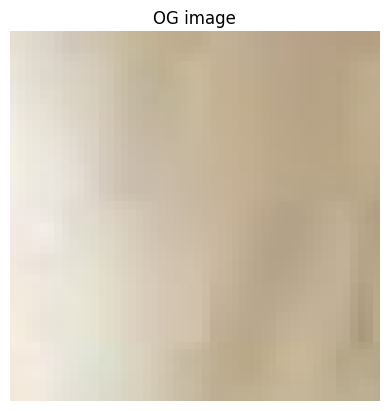

Test for r = 5
RMSE = 3.943331924485519
PSNR = 36.21353691375098


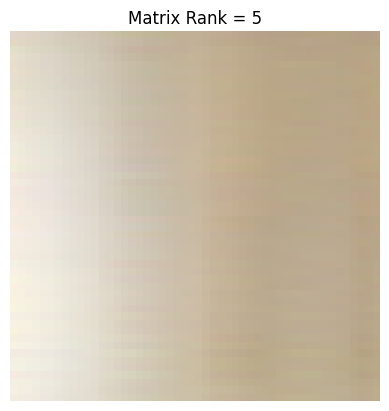

Test for r = 10
RMSE = 3.033106218603848
PSNR = 38.49305121950649


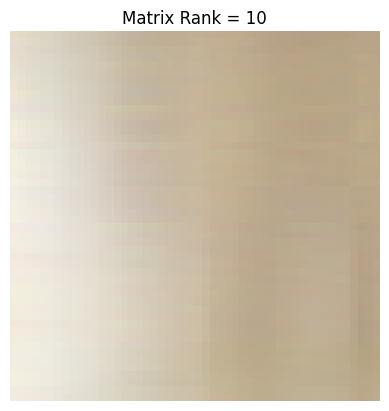

Test for r = 25
RMSE = 2.4895782775401942
PSNR = 40.20828788964646


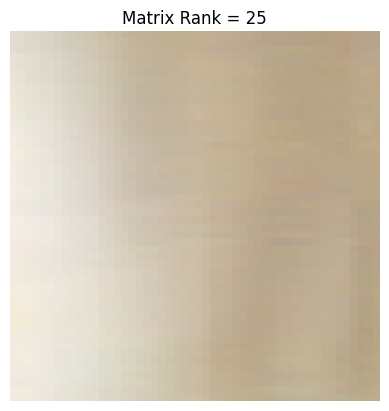

Test for r = 50
RMSE = 1.978989641205835
PSNR = 42.20193318972469


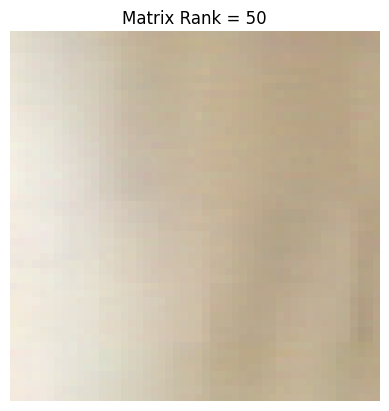

Test for r = 150
RMSE = 1.6032882876555086
PSNR = 44.03057120924392


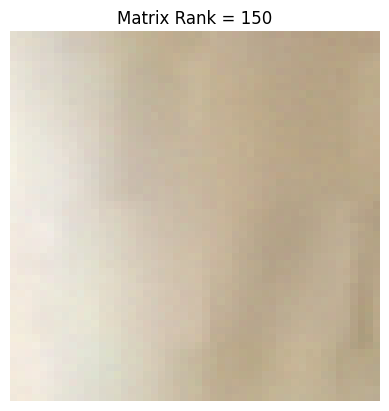

Test for r = 300
RMSE = 0.7717512552629895
PSNR = 50.38125671787772


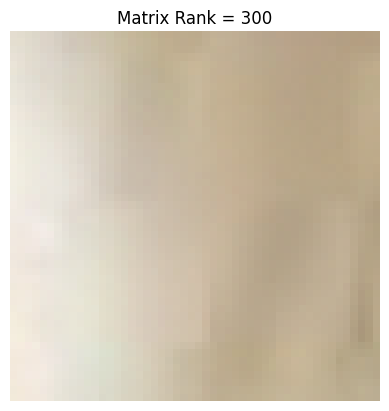

None


In [ ]:
def compress(imag, y, rval=None, retlist=False):
    if rval is None:
        rval = [5, 10, 25, 50, 150, 300]
    q,u,e = y.shape
    m = []
    if not retlist:
        for r in rval:
            print(f"Test for r = {r}")
            w, h, img = matrixfactorization(y, r, 0.001)
            img = img.astype(int)
            img_f = img.reshape(int(q),int(u),int(e))
            rmse = np.sqrt(np.mean((y - img_f) ** 2))
            print(f"RMSE = {rmse}")
            if rmse != 0:
                print(f"PSNR = {20 * np.log10(255 / rmse)}")
            else:
                print(f"PSNR = {float('inf')}")
            m.append(img_f)
            img_f = torch.tensor(img_f)
            plt.title(f"Matrix Rank = {r}")
            plt.imshow(rearrange(img_f, 'c h w -> h w c').numpy())
            plt.axis('off')
            plt.show()
    else:
        for r in rval:
            w, h, img = matrixfactorization(y, r, 0.001)
            img = img.astype(int)
            img_f = img.reshape(int(q),int(u),int(e))
            m.append(img_f)
        return m
np.random.seed(4)
for _ in range(3):    
    i,j = np.random.randint(500,601,2)
    print(i,j)
    y = imag.numpy()
    # print(y.shape)
    y=y[:,i:i+50,j:j+50]
    y = torch.tensor(y)
    plt.imshow(rearrange(y, 'c h w -> h w c').numpy())
    plt.title('OG image')
    plt.axis('off')
    plt.show()
    y=y.numpy()
    print(compress(imag,y))
    

140 115


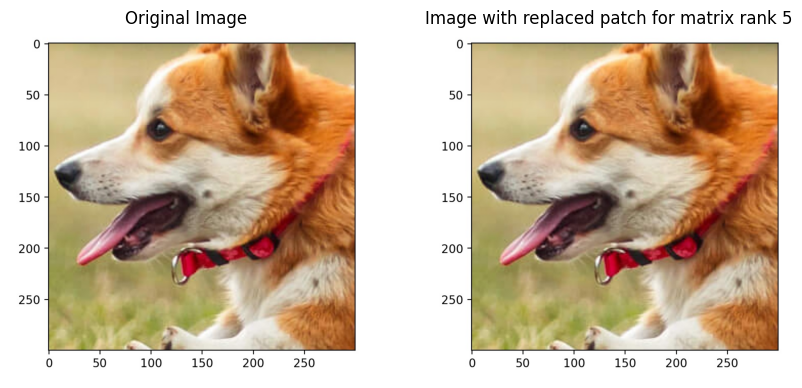

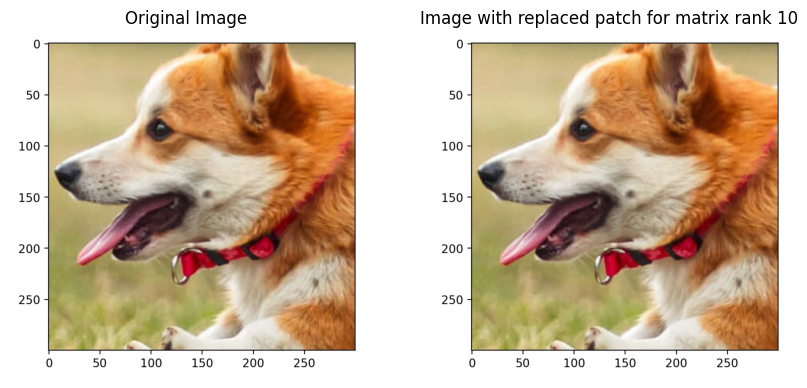

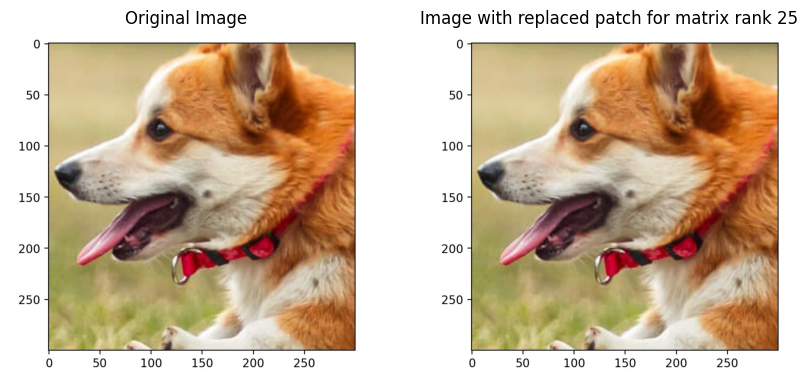

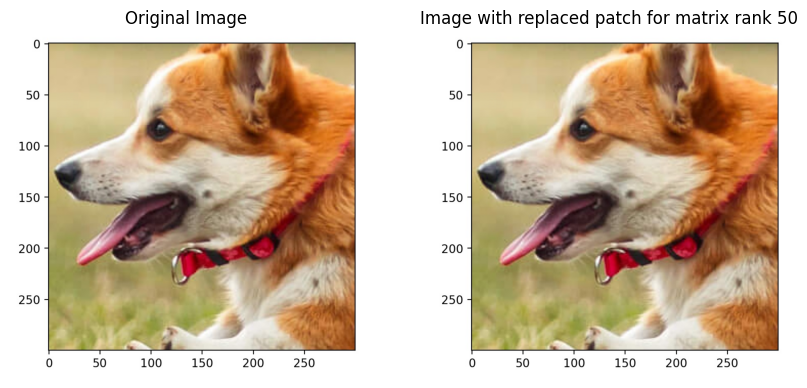

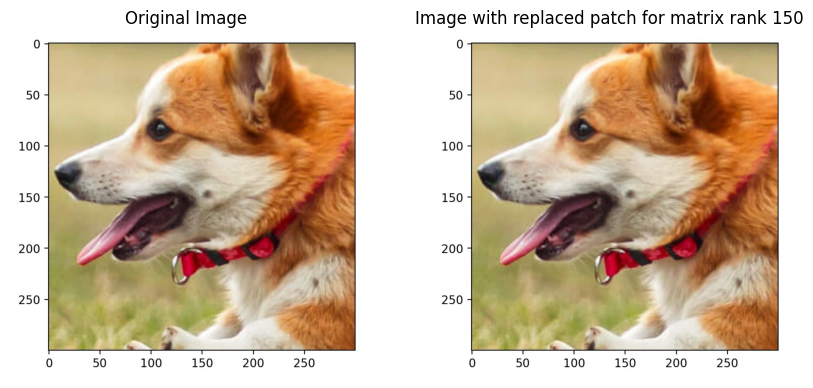

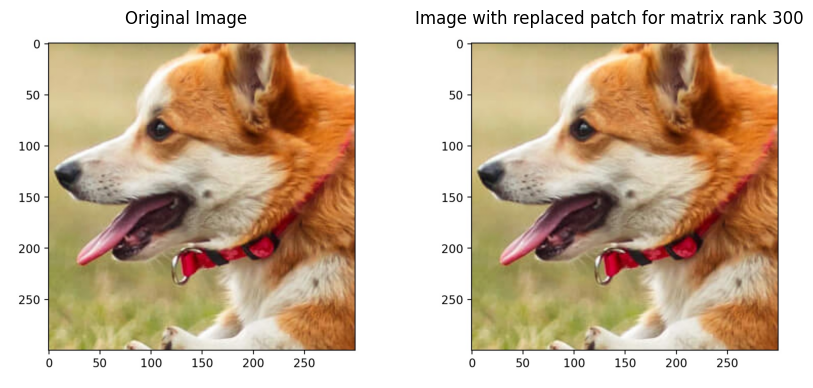

141 172


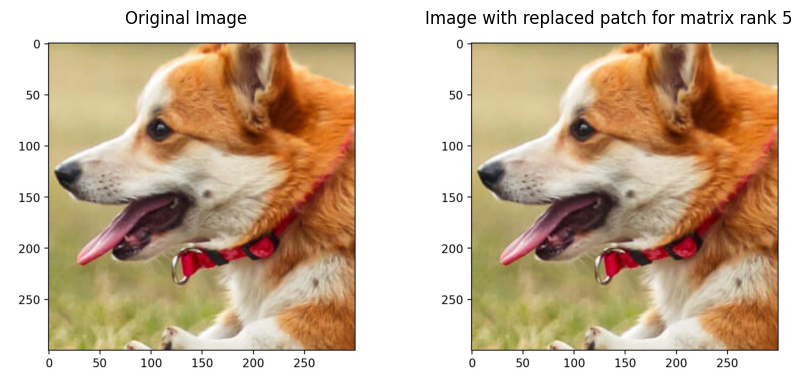

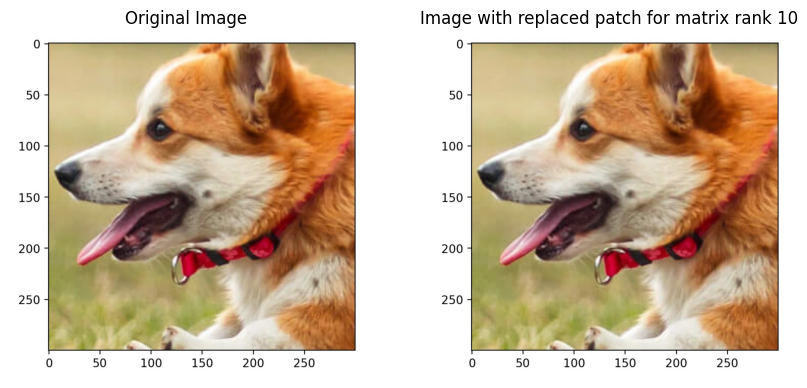

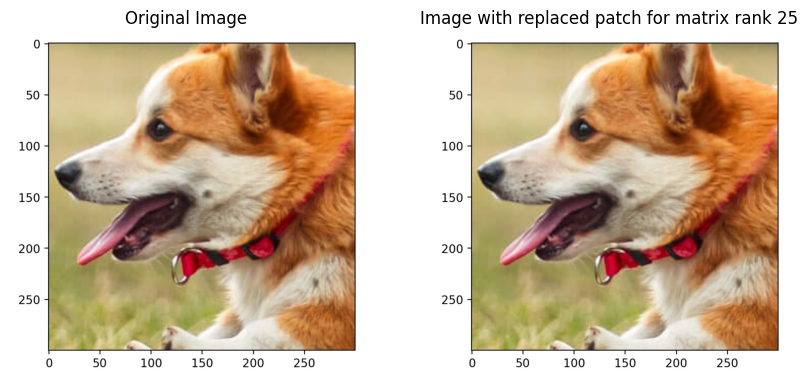

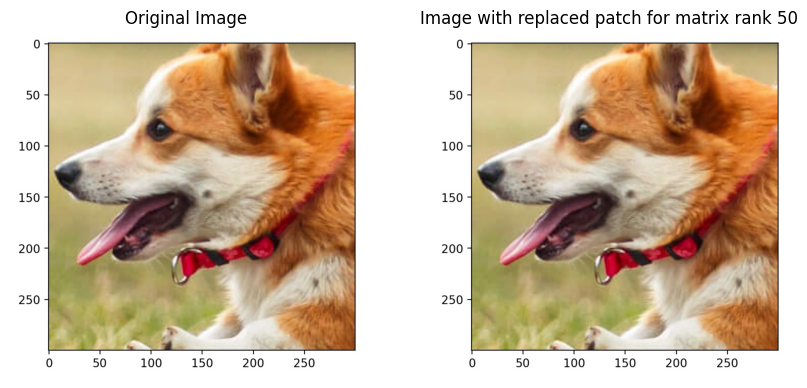

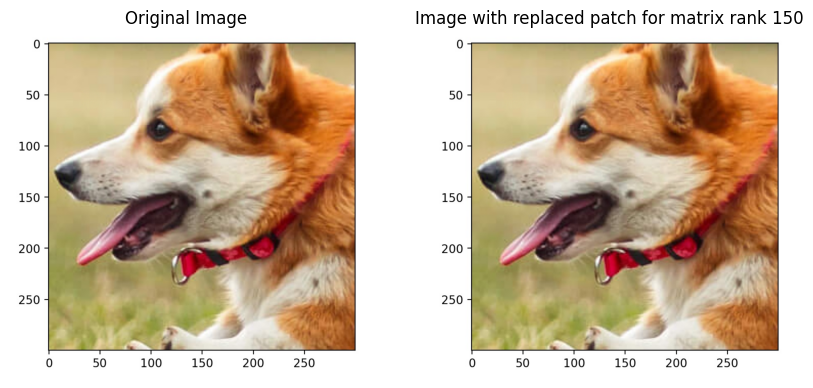

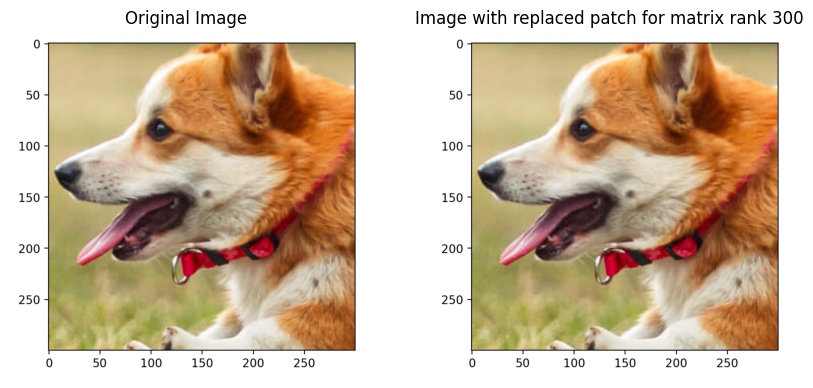

198 135


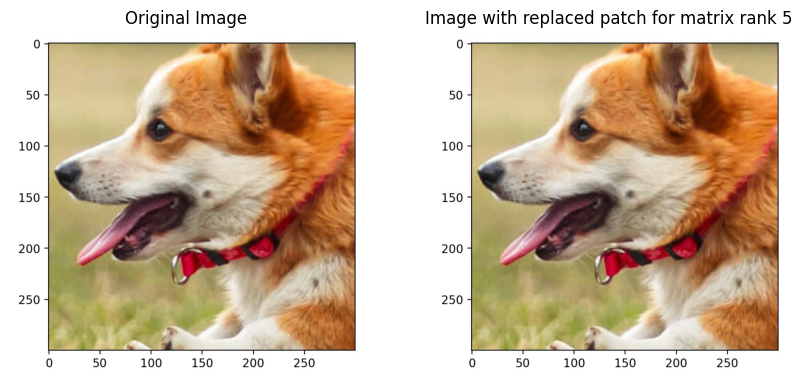

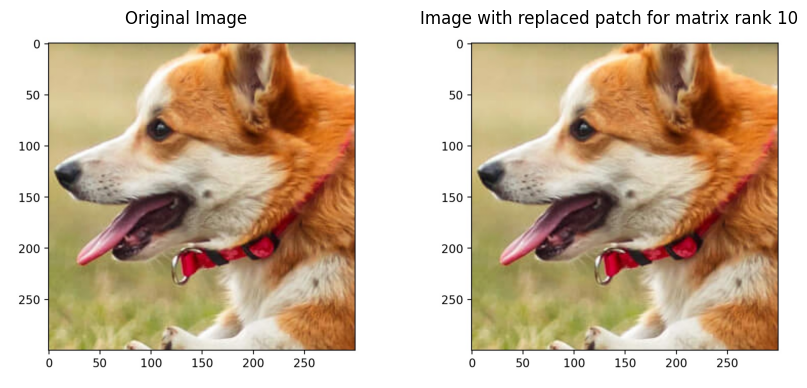

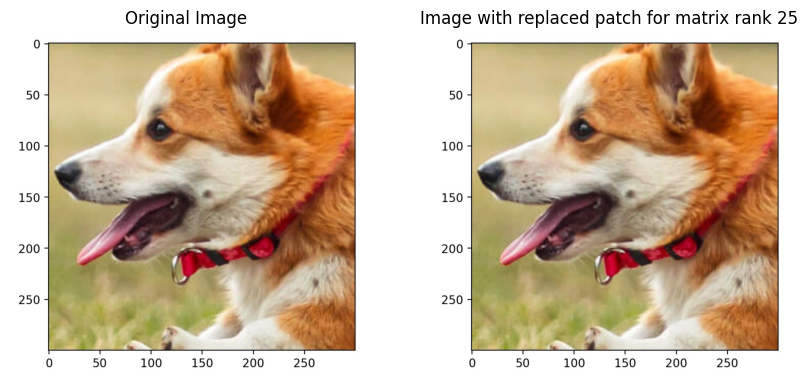

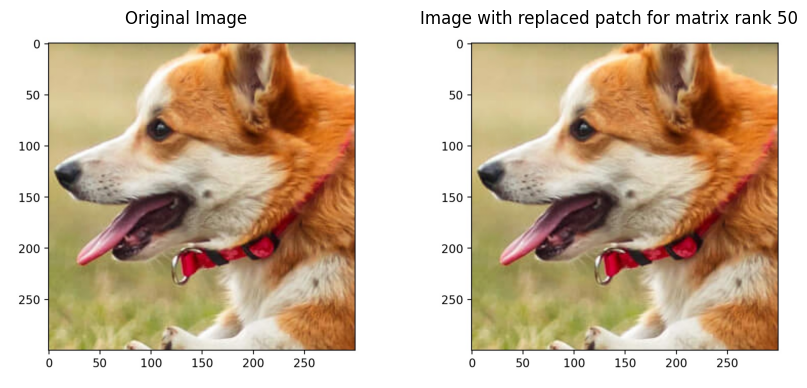

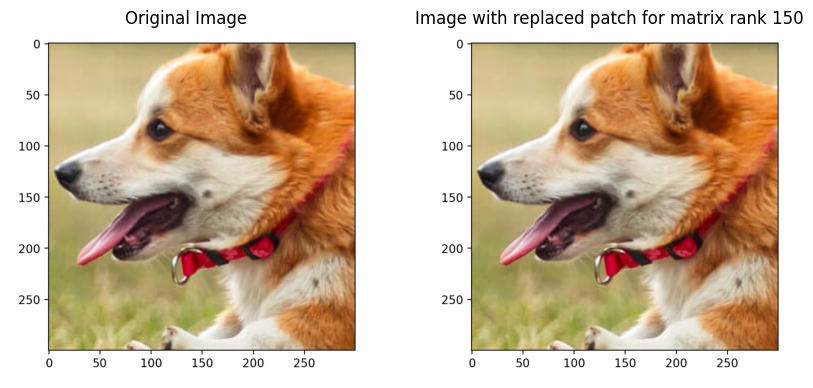

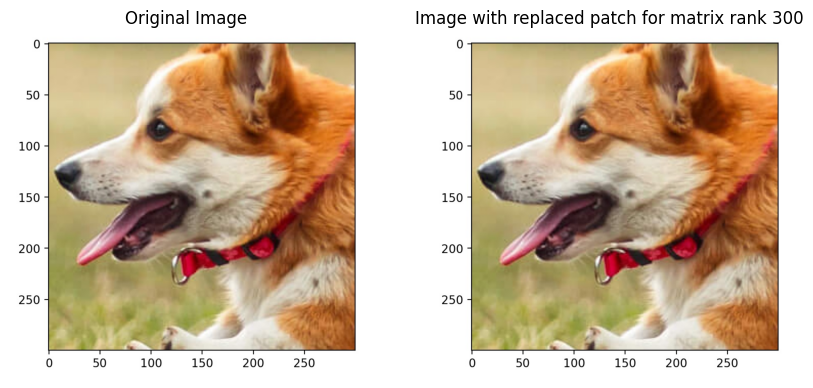

In [ ]:
np.random.seed(2)
for _ in range(3):    
    i,j = np.random.randint(100,201,2)
    print(i,j)
    y = imag.numpy()
    y = y[:,i:i+50,j:j+50]
    k = compress(imag,y,retlist=True)
    rval = [5, 10, 25, 50, 150, 300]
    for w in range(len(k)):
        t = imag.numpy()
        t[:,i:i+50,j:j+50] = k[w]
        t = torch.tensor(t)
        fig, axes = plt.subplots(1, 2, figsize=(10, 5))
        axes[0].imshow(rearrange(imag, 'c h w -> h w c').numpy())
        axes[0].set_title("Original Image")
        axes[0].axis('off')
        axes[1].imshow(rearrange(t, 'c h w -> h w c').numpy())
        axes[1].set_title(f"Image with replaced patch for matrix rank {rval[w]}")
        axes[1].axis('off')
        plt.show()